Column names in the dataset:
Index(['id', 'html', 'political', 'not_political', 'title', 'Gun_leg',
       'message', 'thumbnail', 'created_at', 'updated_at',
       ...
       'Unnamed: 173', 'Unnamed: 174', 'Unnamed: 175', 'Unnamed: 176',
       'Unnamed: 177', 'Unnamed: 178', 'Unnamed: 179', 'Unnamed: 180',
       'Unnamed: 181', 'Unnamed: 182'],
      dtype='object', length=183)


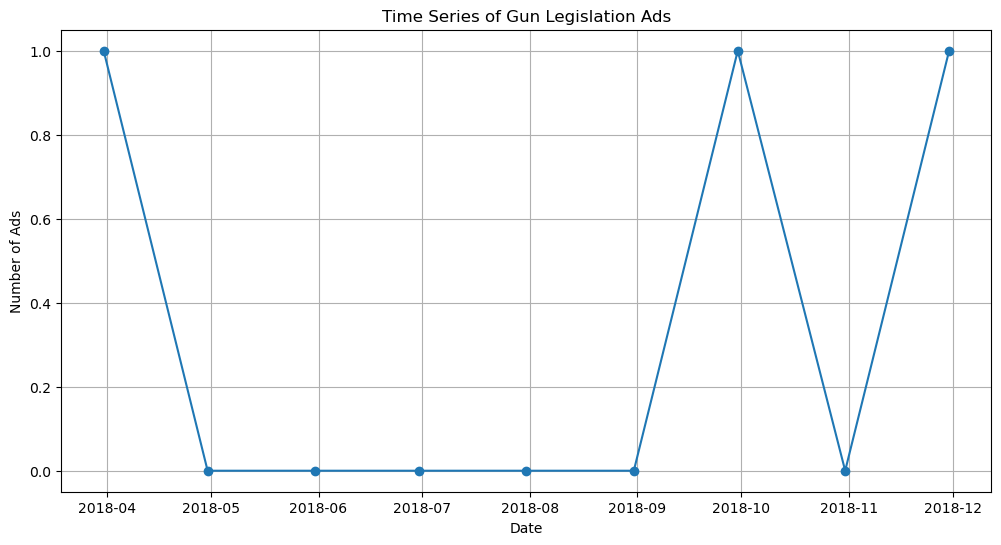

ValueError: x must have 2 complete cycles requires 24 observations. x only has 9 observation(s)

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
file_path = 'areen-prehandcode.csv'  # Replace with the path to your dataset
data = pd.read_csv(file_path)

# Print the column names to verify
print("Column names in the dataset:")
print(data.columns)

# Define the column name containing date information
date_column = 'created_at'  # Change this to the correct column name

# Function to check if a string can be converted to a date
def is_date(string):
    try:
        pd.to_datetime(string)
        return True
    except (ValueError, TypeError):
        return False

# Filter out non-date entries in the date column
data = data[data[date_column].apply(is_date)]

# Convert the valid entries to datetime
data[date_column] = pd.to_datetime(data[date_column])

# Filter the dataset to include only messages related to gun legislation ads
gun_leg_data = data[data['Gun_leg'] == 1]

# Aggregate the data based on the date to create a time series
time_series = gun_leg_data.resample('M', on=date_column).size()  # Monthly aggregation

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series.values, marker='o', linestyle='-')
plt.title('Time Series of Gun Legislation Ads')
plt.xlabel('Date')
plt.ylabel('Number of Ads')
plt.grid(True)
plt.show()

# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(time_series, model='additive')
fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()

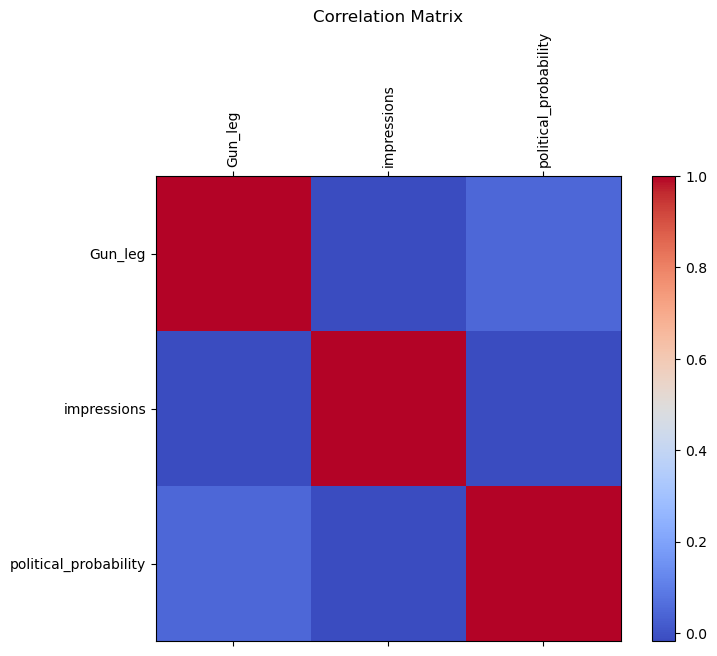

In [ ]:
# Define the columns of interest for correlation analysis
columns_of_interest = ['Gun_leg', 'impressions', 'political_probability']  # Adjust as needed

# Filter the dataset to include only the relevant columns
relevant_data = data[columns_of_interest]

# Compute correlation matrix
correlation_matrix = relevant_data.corr()

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

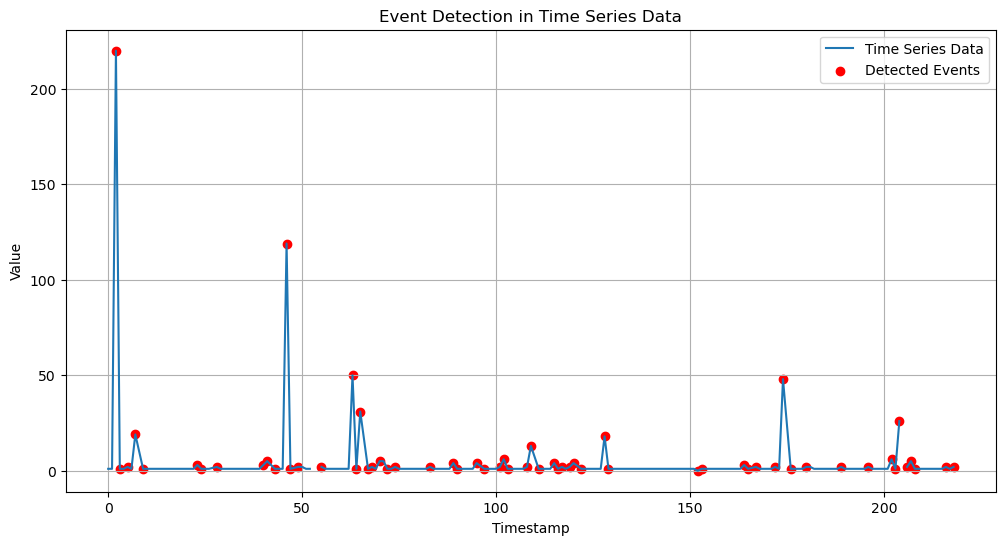

In [18]:
# Define the column of interest for event detection
column_of_interest = 'impressions'  # Adjust as needed

# Convert the column to numeric, handling errors and converting non-numeric values to NaN
data[column_of_interest] = pd.to_numeric(data[column_of_interest], errors='coerce')

# Set threshold for event detection (e.g., percentage change)
threshold = 0.5  # Adjust as needed

# Detect events based on the defined threshold
events = data[data[column_of_interest].pct_change().abs() > threshold]

# Plot the time series data along with the detected events
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[column_of_interest], label='Time Series Data')
plt.scatter(events.index, events[column_of_interest], color='red', label='Detected Events')
plt.title('Event Detection in Time Series Data')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

                                                             id  \
created_at                                                        
2018-06-02 02:31:54                                 2.38428E+16   
2019-03-25 14:48:20  hyperfeed_story_id_5c98ea219f91a7f13265202   
2017-11-10 19:22:38                                 6.09735E+12   
2019-05-26 20:16:04  hyperfeed_story_id_5ceaf3fb22b1c1f98120272   
2019-05-21 20:36:11  hyperfeed_story_id_5ce460eb66a224f40031272   

                                                                  html  \
created_at                                                               
2018-06-02 02:31:54  <div class="_5pcr userContentWrapper"><div cla...   
2019-03-25 14:48:20  <div class="_5pcr userContentWrapper"><div cla...   
2017-11-10 19:22:38  <div class="_1dwg _1w_m _q7o"><div class="_4r_...   
2019-05-26 20:16:04  <div class="_5pcr userContentWrapper"><div cla...   
2019-05-21 20:36:11  <div class="_5pcr userContentWrapper"><div cla...   

           

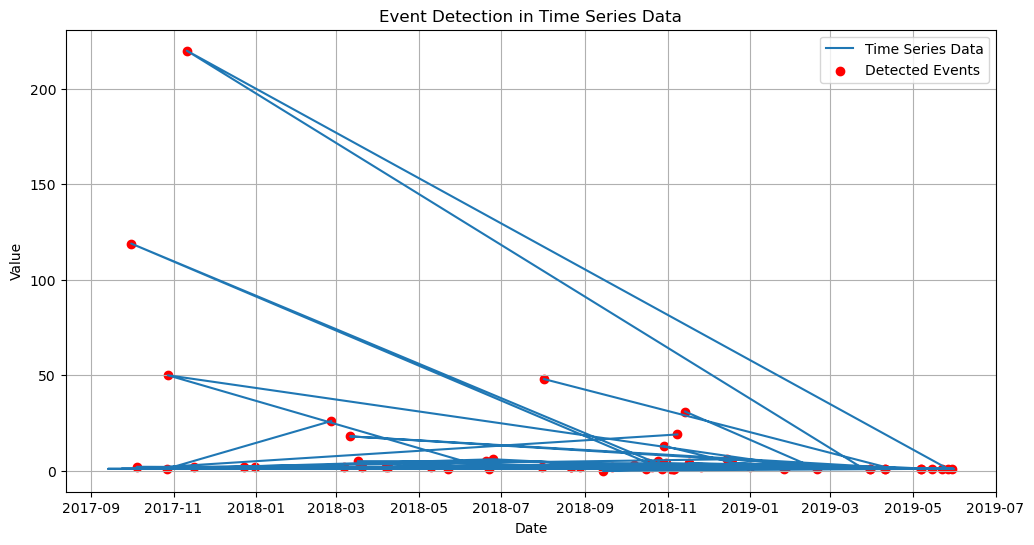

In [ ]:
# Preprocess the 'created_at' column to extract valid timestamps
data['created_at'] = data['created_at'].str.extract(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2})')

# Convert the timestamp column to datetime format
data['created_at'] = pd.to_datetime(data['created_at'])

# Set the timestamp column as the index
data.set_index('created_at', inplace=True)

# Display the updated DataFrame
print(data.head())

# Convert timestamps to naive datetime objects (remove timezone information)
data.index = data.index.tz_localize(None)

# Define the column of interest for event detection
column_of_interest = 'impressions'  # Adjust as needed

# Convert the column to numeric, handling errors and converting non-numeric values to NaN
data[column_of_interest] = pd.to_numeric(data[column_of_interest], errors='coerce')

# Set threshold for event detection (e.g., percentage change)
threshold = 0.5  # Adjust as needed

# Detect events based on the defined threshold
events = data[data[column_of_interest].pct_change().abs() > threshold]

# Plot the time series data along with the detected events
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[column_of_interest], label='Time Series Data')
plt.scatter(events.index, events[column_of_interest], color='red', label='Detected Events')
plt.title('Event Detection in Time Series Data')
plt.xlabel('Date')  # Update the label to 'Date'
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()